In [38]:
from IPython.display import Image
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as pl
import numpy as np
import pydotplus 

%matplotlib inline

In [2]:
def get_features(dataset):
    return [[int(elem) if elem[0] != 'A' else int(elem[1:]) for elem in line[:-1]] 
              for line in dataset]
    
    
def get_target(dataset):
    return [int(line[-1]) - 1 for line in dataset]

In [6]:
with open('german_credit_data.txt') as file:
    dataset = [line.split() for line in file]
    
features = get_features(dataset)
target = get_target(dataset)

In [47]:
count = 0
for f in features:
    if f[0] == 11:
        count += 1
print(count)

274


In [20]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(features, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [21]:
feature_names = [
    'Status of existing checking account',
    'Duration in month',
    'Credit history',
    'Purpose',
    'Credit amount',
    'Savings account/bonds',
    'Present employment since',
    'Installment rate in percentage of disposable income',
    'Personal status and sex',
    'Other debtors / guarantors',
    'Present residence since',
    'Property',
    'Age in years',
    'Other installment plans',
    'Housing',
    'Number of existing credits at this bank',
    'Job',
    'Number of people being liable to provide maintenance for',
    'Telephone',
    'foreign worker',
]
class_names = ['Good', 'Bad']

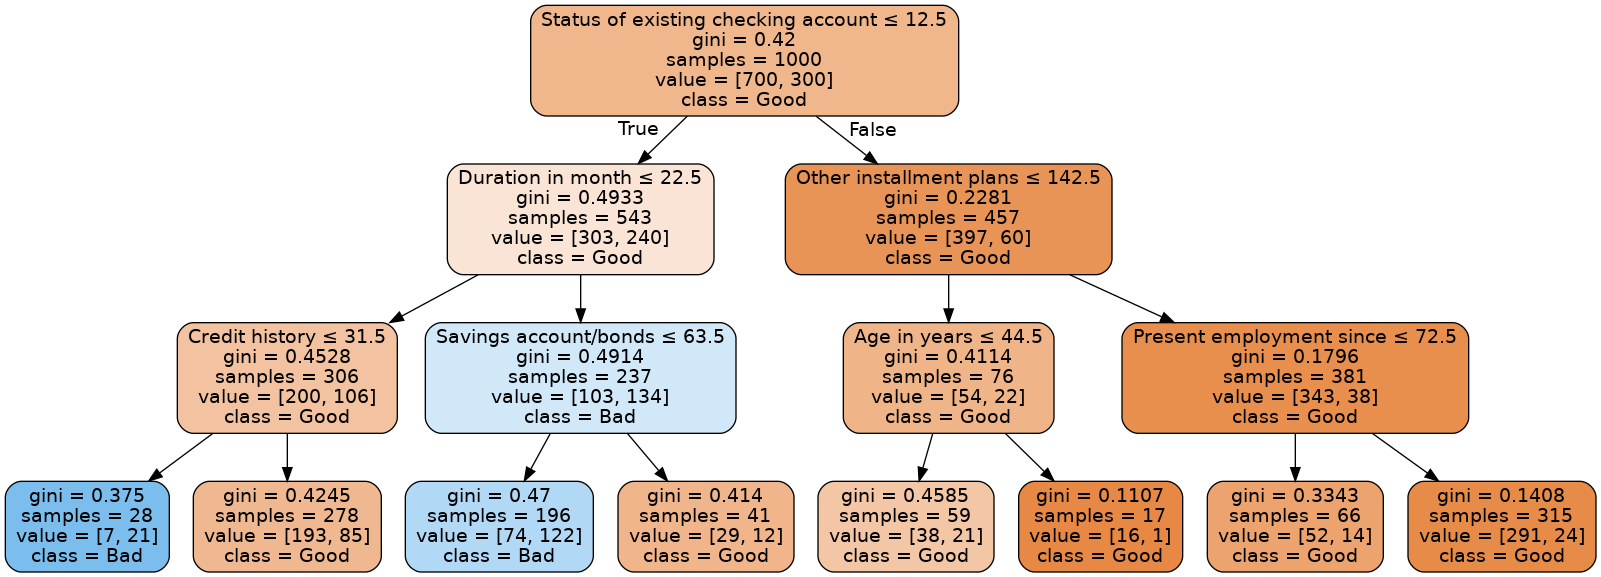

In [22]:
dot_data = tree.export_graphviz(model, out_file="tree.out", 
                         feature_names=feature_names,  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graphviz.graph_from_dot_file("tree.out")  
Image(graph.create_png())

Параметр status of existing checking account показывает сколько марок на счету у клиента. Если он больше $12$, то это означает, что либо на счету больше $200$ марок либо счета нет (правое поддерево). В противном случае на счету меньше 200 марок, в том числе может быть и долг (левое поддерево).

In [29]:
accuracy_cvs = []
train_accuracy = []
plot_range = range(1, 50)
for depth in plot_range:
    model = tree.DecisionTreeClassifier(max_depth=depth)
    accuracy_cvs.append(cross_val_score(model, features, target).mean())
    model.fit(features, target)
    train_accuracy.append(accuracy_score(model.predict(features), target))

(0.6, 1.15)

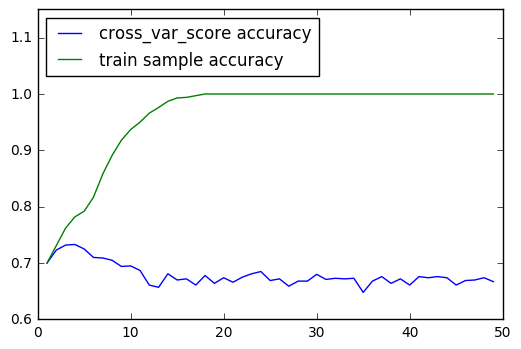

In [43]:
pl.figure()
pl.plot(plot_range, accuracy_cvs, label='cross_var_score accuracy')
pl.plot(plot_range, train_accuracy, label='train sample accuracy')
pl.legend(loc=2)
pl.ylim(0.6, 1.15)